In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.3217   | 8.581     | 5.031     | 5.434     |
| 5         | -0.3165   | 8.393     | 7.24      | 1.726     |
| 6         | -0.3034   | 5.451     | 6.285     | 1.352     |
| 9         | -0.288    | 4.401     | 9.477     | 3.559     |
| 12        | -0.2859   | 2.456     | 2.933     | 3.935     |
| 17        | -0.2466   | 0.3815    | 0.4832    | 0.8444    |
| 43        | -0.2156   | 0.8877    | 6.445     | 8.155     |
| 44        | -0.2      | 0.1314    | 5.717     | 9.879     |
| 45        | -0.2      | 0.01      | 7.871     | 10.0      |
| 48        | -0.2      | 0.01      | 9.217     | 8.167     |
| 52        | -0.2      | 0.01      | 7.365     | 6.761     |
| 53        | -0.2      | 0.01      | 10.0      | 5.979     |
| 58        | -0.2      | 0.01      | 7.082     | 5.354     |
| 59        | -0.2      | 0.01      | 5.215     | 5.22      |
| 62    

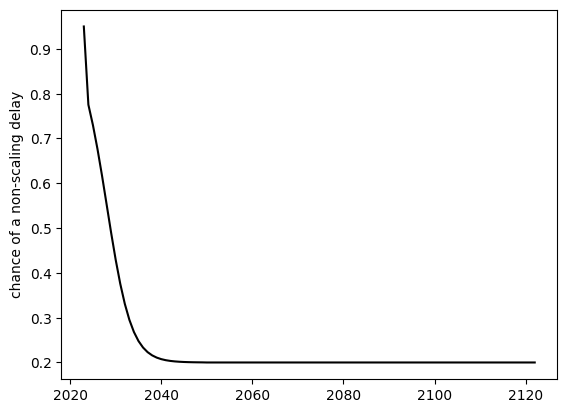

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 78%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 73%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 43%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3738   | 2.865     | 4.244     | 1.241     |
| 5         | -0.3725   | 3.271     | 6.305     | 8.548     |
| 7         | -0.3316   | 1.491     | 3.54      | 4.64      |
| 12        | -0.2673   | 0.7668    | 6.135     | 3.495     |
| 15        | -0.2509   | 0.3654    | 6.655     | 9.854     |
| 16        | -0.25     | 0.238     | 8.941     | 3.39      |
| 25        | -0.25     | 0.1803    | 7.163     | 6.457     |
| 41        | -0.25     | 0.01      | 10.0      | 8.932     |
| 43        | -0.25     | 0.01      | 10.0      | 5.566     |
| 44        | -0.25     | 0.01      | 7.786     | 4.305     |
| 47        | -0.249    | 0.01      | 4.529     | 2.874     |
| 52        | -0.2474   | 0.01      | 6.706     | 2.736     |
| 74        | -0.04839  | 0.01      | 4.236     | 0.9963    |
| 86        | -0.01891  | 0.02071   | 4.718     | 0.9824    |
| 103   

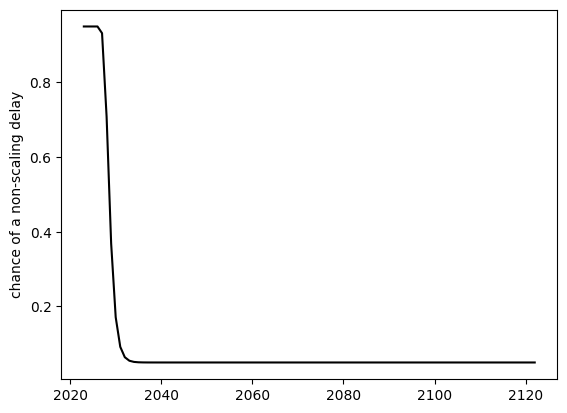

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 93%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.155    | 4.372     | 9.696     | 4.963     |
| 6         | -0.1542   | 3.742     | 8.223     | 0.04759   |
| 10        | -0.1363   | 1.611     | 2.649     | 0.9819    |
| 15        | -0.07851  | 0.517     | 3.576     | 0.1783    |
| 21        | -0.07513  | 0.2747    | 5.83      | 2.976     |
| 52        | -0.075    | 0.01      | 5.559     | 5.037     |
| 62        | -0.075    | 0.01323   | 8.519     | 3.657     |
| 73        | -0.075    | 0.01      | 10.0      | 2.492     |
| 84        | -0.04745  | 0.4417    | 9.795     | 0.3411    |
| 105       | -0.01461  | 0.07756   | 9.223     | 0.7578    |
Curve params found
{'push': 0.07756365854515124,
 'shift': 9.222917895237273,
 'slope': 0.7577523143527506}
-
## Chance of nonscaling delay ##


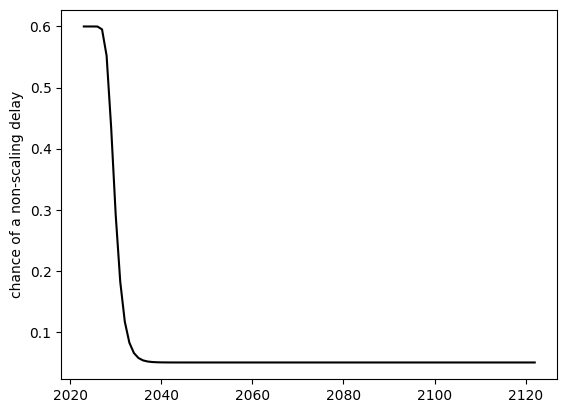

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 43%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.05239  | 0.6008    | 6.11      | 5.704     |
| 24        | -0.05214  | 0.5942    | 6.425     | 6.048     |
| 42        | -0.05     | 0.01      | 10.0      | 7.745     |
| 46        | -0.05     | 0.01      | 5.131     | 3.643     |
| 70        | -0.05     | 0.01      | 6.421     | 3.054     |
| 120       | -0.05     | 0.03001   | 5.858     | 2.848     |
Curve params found
{'push': 0.030012402028542398,
 'shift': 5.858356933366692,
 'slope': 2.8482545222628937}
-
## Chance of nonscaling delay ##


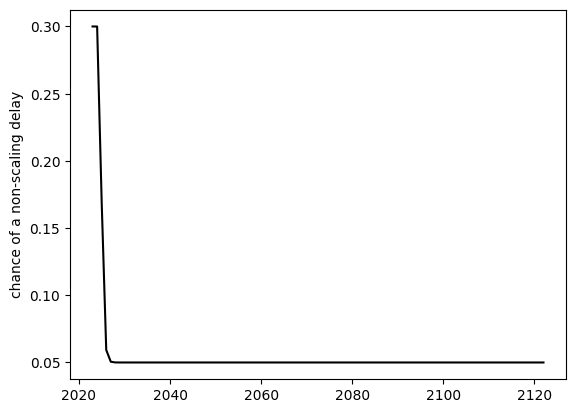

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chan

In [9]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(4, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 20        | -0.01667  | 0.05422   | 2.08      | 2.601     |
| 48        | -0.01667  | 0.01      | 10.0      | 2.526     |
| 119       | -0.01661  | 0.01      | 2.212     | 1.677     |
Curve params found
{'push': 0.01, 'shift': 2.212233361049498, 'slope': 1.6772506773599962}
-
## Chance of nonscaling delay ##


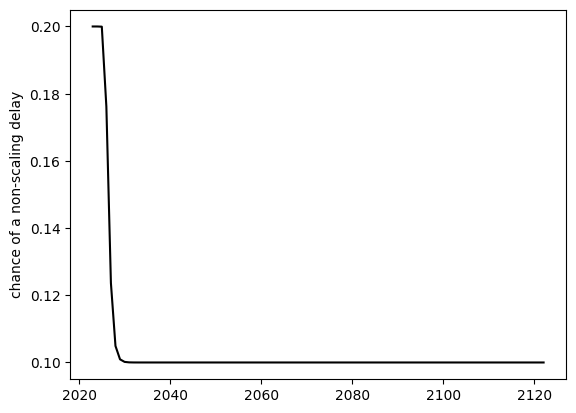

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.4, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 7         | -0.04557  | 0.9831    | 4.062     | 0.8806    |
| 12        | -0.03442  | 0.4103    | 4.406     | 8.276     |
| 42        | -0.03333  | 0.01      | 4.183     | 10.0      |
| 57        | -0.03333  | 0.03673   | 7.797     | 5.526     |
| 60        | -0.03333  | 0.01      | 10.0      | 3.944     |
| 76        | -0.03332  | 0.01      | 10.0      | 2.252     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 2.252194162179911}
-
## Chance of nonscaling delay ##


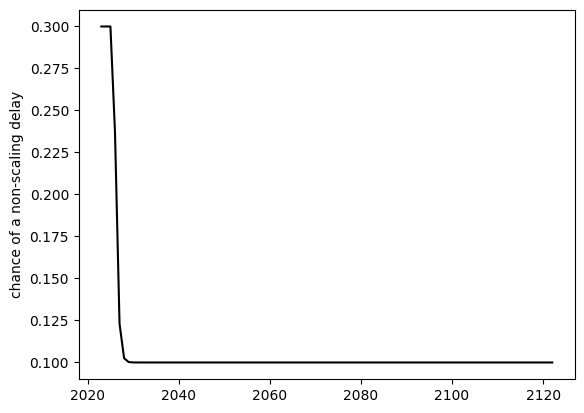

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [10]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
